# Curse lab

In [10]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

## lab1:


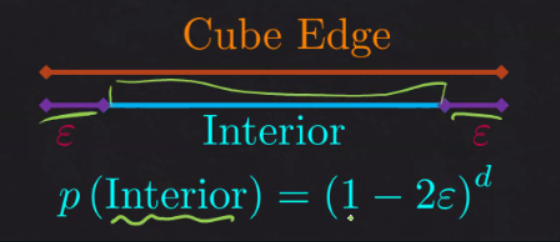

eps = 1.1920928955078125e-07


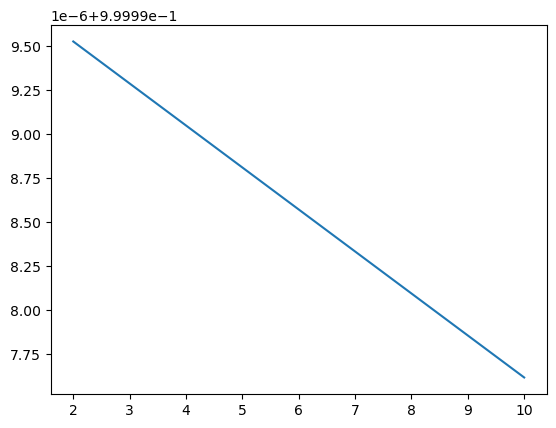

In [30]:
p_inerior = []
d=[2,3,4,5,6,7,8,9,10]
eps = np.finfo(np.float32).eps
print(f"eps = {eps}")
for i in d:
    p_inerior.append ( (1-2*eps)**i )

#plot on graph
plt.plot(d, p_inerior)


## lab1: empirical calculation

The [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) implies the distribution of distance behave differently as the dimension grows.  
This section shows few empirical calculations to demonstrate this.

* <font color='brown'>(**#**)</font> Additional analysis is given at [Curse of Dimensionality: An Intuitive Exploration](https://scribe.rip/1fbf155e1411).

In [11]:
# Curse of Dimensionality
# Show the distribution of the distance in a cube in dimension `d`
lD      = [2, 3, 10, 50, 100, 500, 1_000, 10_000]
numPts  = 500
mD      = np.empty(shape = (len(lD), (numPts * (numPts - 1)) // 2)) #<! (numPts, Number of pairs without the diagonal)
vMaxDist = np.empty(len(lD)) #<! Maximum distance in the cube 

for ii, dataDim in enumerate(lD):
    mX = np.random.rand(numPts, dataDim) #<! Data
    mD[ii] = sp.spatial.distance.pdist(mX) #!< Pair Wise Distance
    vMaxDist[ii] = np.sqrt(dataDim)


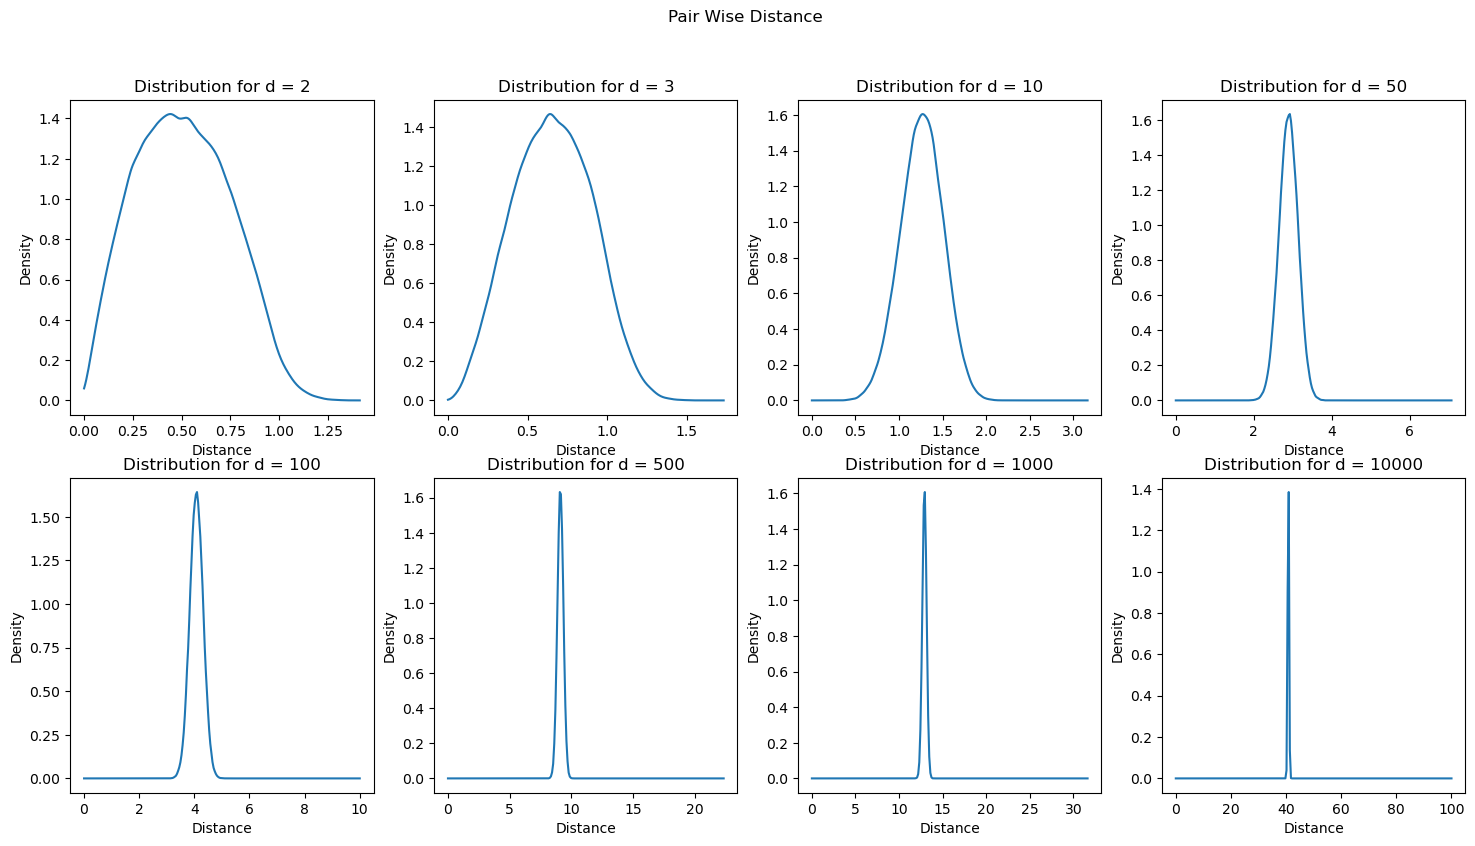

In [13]:
numGridPts = 250

# Plot Results
hF, vHA = plt.subplots(nrows = 2, ncols = math.ceil(len(lD) / 2), figsize = (18, 9))

hF.suptitle('Pair Wise Distance')

for ii, hA in enumerate(vHA.flat):
    # See https://github.com/tillahoffmann/snippets for bounded KDE Estimation
    vG = np.linspace(0, vMaxDist[ii], numGridPts)
    oKdeGauss = sp.stats.gaussian_kde(mD[ii])
    vP = oKdeGauss(vG)
    hA.plot(vG, vP)
    hA.set_xlabel('Distance')
    hA.set_ylabel('Density')
    hA.set_title(f'Distribution for d = {lD[ii]}')

## lab2 : using interior vol

The [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) implies the distribution of distance behave differently as the dimension grows.  

* <font color='green'>(**@**)</font> Show a graph of the ratio between the mean distance of a points in a cube to the maximum distance as a function of `d`.
* <font color='green'>(**@**)</font> Given the the volume of a ball in $\mathbb{R}^{d}$ (See [Volume of an $n$ Ball](https://en.wikipedia.org/wiki/Volume_of_an_n-ball)), show the relation between the volume of the ball inscribed within the _unit cube_ in $\mathbb{R}^{d}$ and the cube itself.
* <font color='red'>(**?**)</font> Since the ratio between the volume of the ball and the unit cube goes to zero, what does it mean about the interior of the cube if points are uniformly drawn in the cube?